In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [ ]:
import pandas as pd
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Breast_cancer_data.csv']))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
#includes
import numpy as np
from collections import Counter
import pandas as pd
import os
import PIL.Image

In [ ]:
#knn class
class KNeighborsClassifieR(object):

	def __init__(self):
		pass
    #"training" function
	def fit(self, X, y):
		self.X_train = X
		self.y_train = y

    #predict function, output of this function is lis to
	def predict(self, X_test, k=5):
		distances = self.compute_distances(self.X_train, X_test)
		vote_results = []
		for i in range(len(distances)):
			votesOneSample = []
			for j in range(k):
				votesOneSample.append(distances[i][j][1])
			vote_results.append(Counter(votesOneSample).most_common(1)[0][0])
		
		return vote_results
    

	#For each sample and every item in test set algorithm is making tuple in distance list
	#this is how list looks =>> distances = [[[distance, class],[distance, class],[distance, class],[distance, class]]]
	#distances and sort
	def compute_distances(self, X, X_test):
		distances = []
		for i in range(X_test.shape[0]):
			euclidian_distances = np.zeros(X.shape[0])
			oneSampleList = []
			for j in range(len(X)):
				euclidian_distances[j] = np.sqrt(np.sum(np.square(np.array(X_test[i]) - np.array(X[j]))))
				oneSampleList.append([euclidian_distances[j], self.y_train[j]])
			distances.append(sorted(oneSampleList))
		return distances

        

In [ ]:
#to check how much did algo predict right
def accuracy(y_test, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_test[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_test))*100

In [ ]:
def run(k):
    # Importing the dataset
    # dataset = pd.read_csv('breastCancer.csv')
    # dataset.replace('?', -9999, inplace=True)
    dataset = pd.read_csv(io.BytesIO(uploaded['Breast_cancer_data.csv']))
    dataset = dataset.applymap(np.int64)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1].values
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    # Feature Scaling
#     from sklearn.preprocessing import StandardScaler
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
    
    classifier = KNeighborsClassifieR()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test,k)
    # print("My KNN accuracy: ",accuracy(y_test, y_pred),'%')
    return accuracy(y_test, y_pred)
    

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

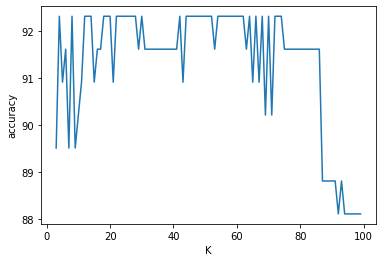

92.3076923076923

In [ ]:
x_axis=[]
y_axis=[]
for k in range(3,100):
  y_axis.append(run(k))
  x_axis.append(k)
plt.plot(x_axis,y_axis)
plt.ylabel('accuracy')
plt.xlabel('K')
plt.show()
max(y_axis)

In [ ]:
run(19)

92.3076923076923

In [ ]:
def skLearnKNN():
    # Importing the dataset
    # dataset = pd.read_csv('breastCancer.csv')
    # dataset.replace('?', 0, inplace=True)
    dataset = pd.read_csv(io.BytesIO(uploaded['Breast_cancer_data.csv']))
    dataset = dataset.applymap(np.int64)
    X = dataset.iloc[:,:-1].values
    y = dataset.iloc[:,-1].values
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

    # Feature Scaling
#     from sklearn.preprocessing import StandardScaler
#     sc = StandardScaler()
#     X_train = sc.fit_transform(X_train)
#     X_test = sc.transform(X_test)
    
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(19)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Sklearn accuracy: ", accuracy(y_test, y_pred),'%')

In [ ]:
skLearnKNN()

Sklearn accuracy:  92.3076923076923 %
